In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nd2reader import ND2Reader
from skimage.transform import resize
data_path = '/home/richard/Documents/dslab/data/'

### Data Loading

In [66]:
# load image in .nd2 format
nd2_image = ND2Reader(data_path + '01_raw/Large mvt 1.nd2')
dapi_frame_1 = nd2_image.get_frame_2D(t=0,c=0)
fitc_frame_1 = nd2_image.get_frame_2D(t=0,c=1)
tritc_frame_1 = nd2_image.get_frame_2D(t=0,c=2)
cy5_frame_1 = nd2_image.get_frame_2D(t=0,c=3)
brightfield_frame_1 = nd2_image.get_frame_2D(t=0,c=4)

In [3]:
# load data set in .npy format
X = np.load(data_path + '03_features/fulldataset_large_mvt_1.npy', allow_pickle=True)
X_df = pd.DataFrame(X)

In [4]:
first_frame = pd.DataFrame(X_df[0].iloc[0])

In [30]:
first_frame.head(2)

,droplet_id,frame,center_row,center_col,radius,nr_cells,patch,cell_signals
0,0,0,1506,2728,21,0,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","Empty DataFrame Columns: [cell_id, center_row,..."
1,1,0,1602,1605,21,0,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","Empty DataFrame Columns: [cell_id, center_row,..."


In [26]:
# filter out droplets with no cells
first_cells = first_frame[first_frame["nr_cells"] > 0]
len(first_cells)

In [44]:
# get first entry of patch column
first_patch = first_cells["patch"].iloc[2]

In [56]:
first_cells.iloc[0]["center_row"]

190

### Comparing Original Image and Preprocessed

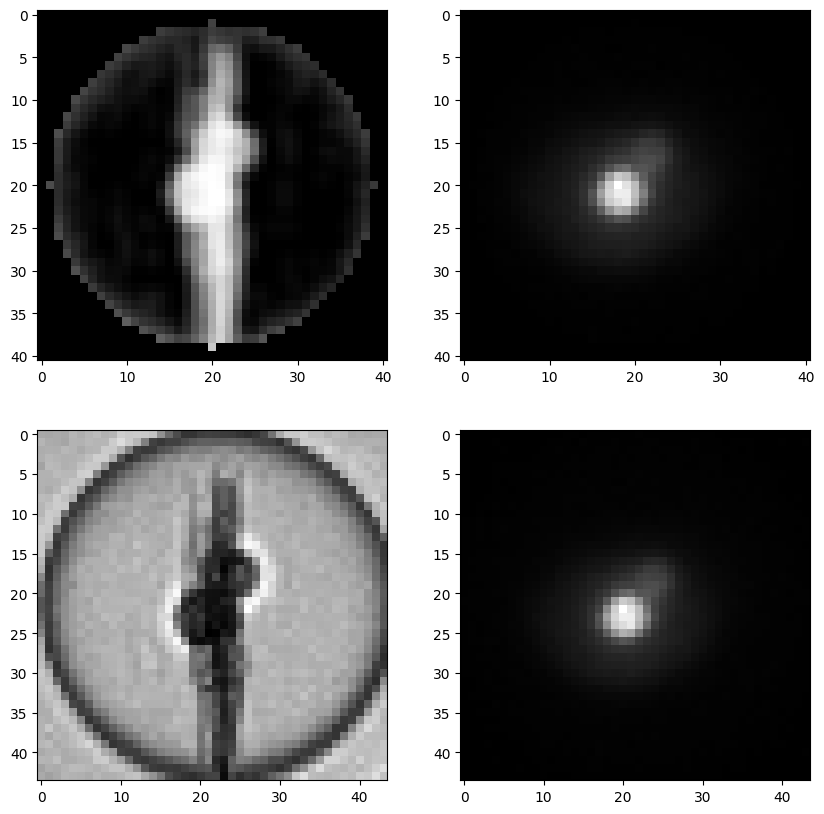

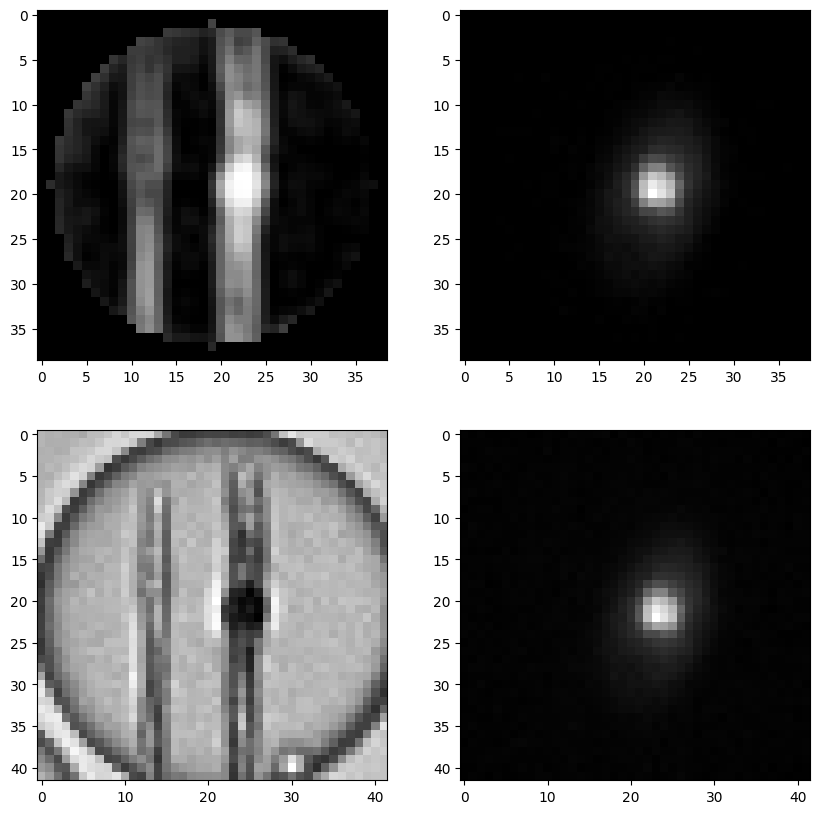

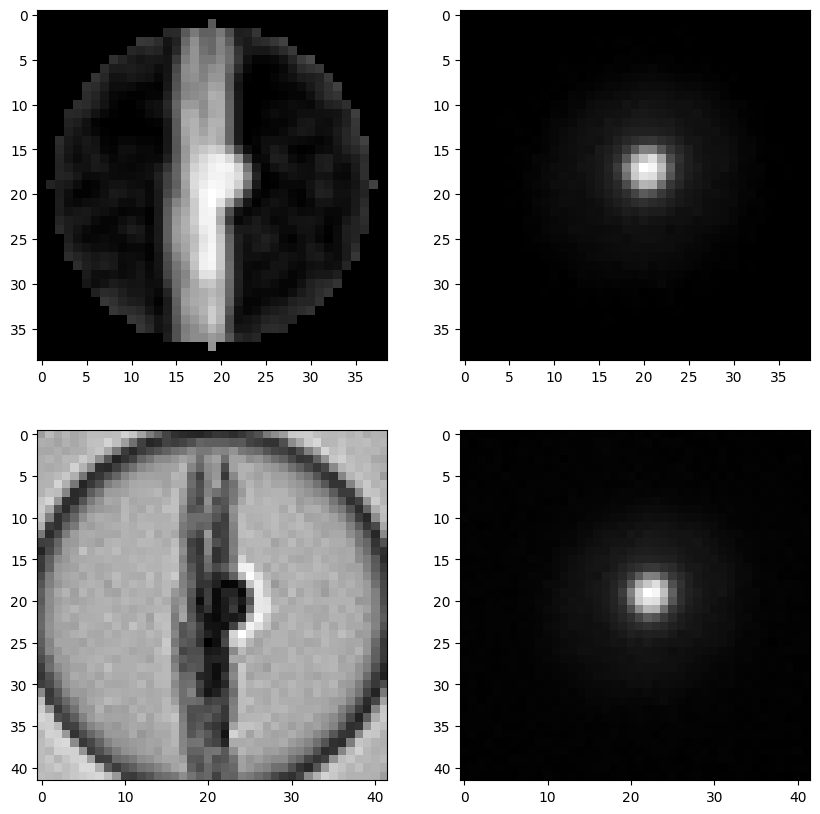

In [65]:
# plot first 5 patches
for i in range(3):

    # normalize into range (0,1)
    patch =  first_cells["patch"].iloc[i][0]
    patch = patch - patch.min()
    patch = patch / patch.max()

    patch2 =  first_cells["patch"].iloc[i][1]
    patch2 = patch2 - patch2.min()
    patch2 = patch2 / patch2.max()

    # get row, column and radius
    row = first_cells.iloc[i]["center_row"]
    column = first_cells.iloc[i]["center_col"]
    radius = first_cells.iloc[i]["radius"]

    # get brightfield patch
    patch_bf = brightfield_frame_1[row-radius:row+radius, column-radius:column+radius]
    patch_bf = patch_bf - patch_bf.min()
    patch_bf = patch_bf / patch_bf.max()

    # get dapi patch
    patch_dapi = dapi_frame_1[row-radius:row+radius, column-radius:column+radius]
    patch_dapi = patch_dapi - patch_dapi.min()
    patch_dapi = patch_dapi / patch_dapi.max()

    # plot 4 patches in grayscale
    fig, ax = plt.subplots(2,2, figsize=(10,10))
    ax[0,0].imshow(patch, cmap='gray')
    ax[0,1].imshow(patch2, cmap='gray')
    ax[1,0].imshow(patch_bf, cmap='gray')
    ax[1,1].imshow(patch_dapi, cmap='gray')
    plt.show()

### Looking at additional channels

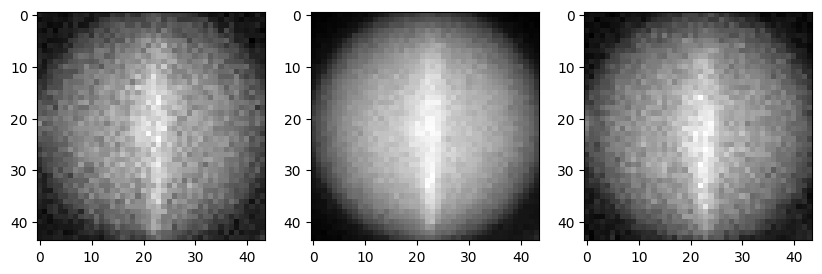

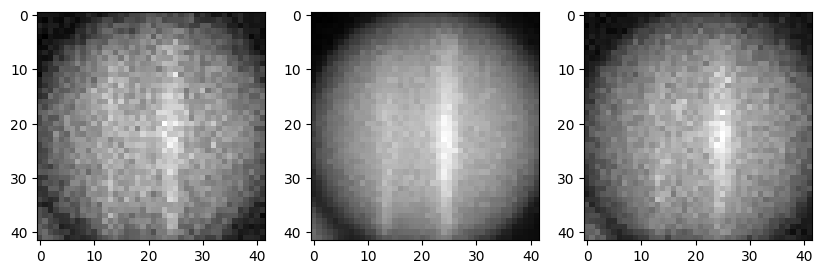

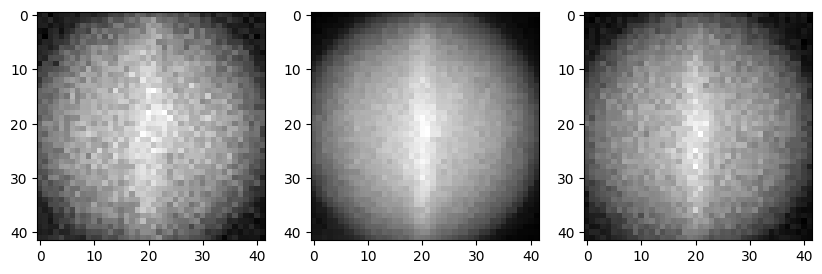

In [67]:
# plot first 5 patches
for i in range(3):

    # get row, column and radius
    row = first_cells.iloc[i]["center_row"]
    column = first_cells.iloc[i]["center_col"]
    radius = first_cells.iloc[i]["radius"]

    # get second channel
    patch_fitc = fitc_frame_1[row-radius:row+radius, column-radius:column+radius]
    patch_fitc = patch_fitc - patch_fitc.min()
    patch_fitc = patch_fitc / patch_fitc.max()

    # get third channel
    patch_tritc = tritc_frame_1[row-radius:row+radius, column-radius:column+radius]
    patch_tritc = patch_tritc - patch_tritc.min()
    patch_tritc = patch_tritc / patch_tritc.max()

    # get fourth channel
    patch_cy5 = cy5_frame_1[row-radius:row+radius, column-radius:column+radius]
    patch_cy5 = patch_cy5 - patch_cy5.min()
    patch_cy5 = patch_cy5 / patch_cy5.max()

    # plot 3 patches in grayscale
    fig, ax = plt.subplots(1,3, figsize=(10,10))
    ax[0].imshow(patch_fitc, cmap='gray')
    ax[1].imshow(patch_tritc, cmap='gray')
    ax[2].imshow(patch_cy5, cmap='gray')

### Looking at effect of resizing

In [43]:
arr = first_frame["patch"].iloc[0]

In [44]:
arr.shape

(2, 39, 39)

In [45]:
arr = resize(arr, (2,40,40))

In [46]:
arr = np.expand_dims(arr, axis=0)

### Resized

In [47]:
arr.shape

(1, 2, 40, 40)

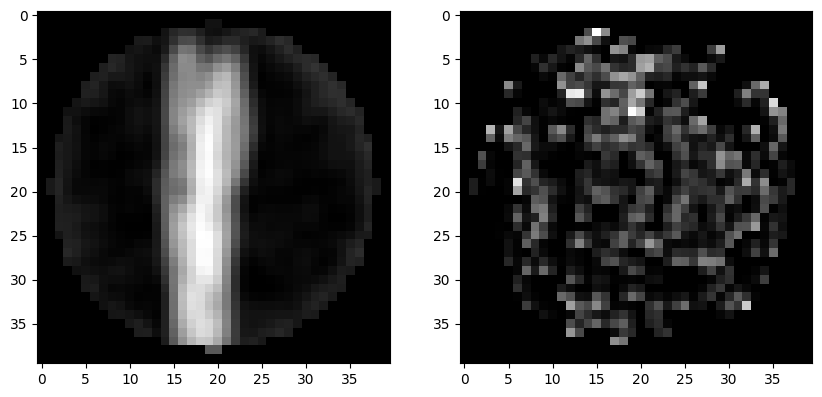

In [48]:
# print 2 channels in grayscale
fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(arr[0][0], cmap='gray')
ax[1].imshow(arr[0][1], cmap='gray')


### Preprocessed

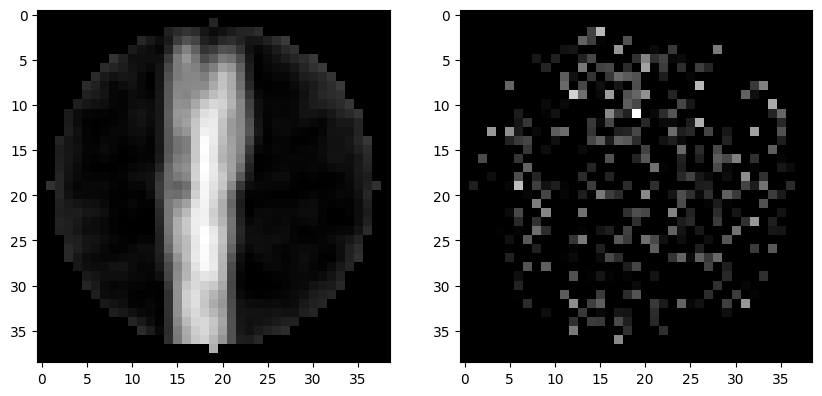

In [25]:
# print 2 channels in grayscale
fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(arr[0], cmap='gray')
ax[1].imshow(arr[1], cmap='gray')

In [17]:
arr.shape

(2, 39, 39)